In [1]:
import os
import sys
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from data_math import pose3, rotation3, quaternion

In [2]:
unpickled_df = pd.read_pickle("../crowdbot_test.pkl")  
unpickled_df  

,id,voxelgrids,positions,poses,odoms
0,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[-3.9796502059518133, -0.407786642725648, 9.5...","[[[23.0, 3.0, 0.3006347715854645], [23.0, 2.0,...","[[-0.20203067362308502, 0.33355697989463806, -..."
1,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[-3.2283142130168585, -0.44177959305074155, 1...","[[[11.0, 12.0, 0.3377051055431366], [14.0, 10....","[[-0.20203067362308502, 0.33355697989463806, -..."
2,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[0.08182090220213478, -0.1830694860444903, 11...","[[[14.0, 8.0, 0.30739375948905945], [13.0, 6.0...","[[-0.20203067362308502, 0.33355697989463806, -..."
3,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[0.8919666787671431, -0.17092633749419972, 14...","[[[18.0, 9.0, 0.5298383235931396], [20.0, 7.0,...","[[-0.20203067362308502, 0.33355697989463806, -..."
4,-1,"[[[84, 27], [85, 27], [43, 30], [85, 28], [82,...","[[-2.0157617127436587, -0.29384043320975256, 1...","[[[13.0, 7.0, 0.363445520401001], [15.0, 5.0, ...","[[-0.20018281042575836, 0.33358797430992126, -..."
...,...,...,...,...,...
39,-1,"[[[80, 20], [7, 12], [63, 33], [49, 64], [49, ...","[[-4.025365976244598, -0.0988068706431466, 9.3...","[[[13.0, 9.0, 0.1467420756816864], [13.0, 6.0,...","[[11.9245023727417, -1.218193531036377, -0.356..."
42,-1,"[[[36, 50], [35, 39], [33, 46], [27, 38], [36,...","[[1.115641210726726, -0.30486902735738813, 5.0...","[[[21.0, 20.0, 0.373444139957428], [25.0, 15.0...","[[11.4912748336792, -0.9774567484855652, -0.36..."
46,-1,"[[[41, 64], [28, 65], [41, 54], [40, 65], [21,...","[[-1.8076702008850272, -0.4770264912145216, 14...","[[[19.0, 15.0, 0.5141242742538452], [20.0, 14....","[[8.455480575561523, -0.21006661653518677, -0...."
50,-1,"[[[27, 48], [27, 46], [27, 47], [28, 46], [26,...","[[1.672394906328681, -0.11874361747850107, 6.3...","[[[24.0, 14.0, 0.3946138620376587], [27.0, 11....","[[6.112685203552246, -1.1716225147247314, -0.5..."


In [3]:
# filter sequence length
df = unpickled_df.copy()
df.reset_index(inplace=True, drop=True)
for idx, row in df.iterrows():
    if row.positions.shape[0] < 15:
        df = df[df.index != idx]

In [4]:
df

,id,voxelgrids,positions,poses,odoms
1,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[-3.2283142130168585, -0.44177959305074155, 1...","[[[11.0, 12.0, 0.3377051055431366], [14.0, 10....","[[-0.20203067362308502, 0.33355697989463806, -..."
2,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[0.08182090220213478, -0.1830694860444903, 11...","[[[14.0, 8.0, 0.30739375948905945], [13.0, 6.0...","[[-0.20203067362308502, 0.33355697989463806, -..."
3,-1,"[[[48, 41], [91, 50], [37, 38], [90, 51], [45,...","[[0.8919666787671431, -0.17092633749419972, 14...","[[[18.0, 9.0, 0.5298383235931396], [20.0, 7.0,...","[[-0.20203067362308502, 0.33355697989463806, -..."
4,-1,"[[[84, 27], [85, 27], [43, 30], [85, 28], [82,...","[[-2.0157617127436587, -0.29384043320975256, 1...","[[[13.0, 7.0, 0.363445520401001], [15.0, 5.0, ...","[[-0.20018281042575836, 0.33358797430992126, -..."
5,-1,"[[[20, 20], [15, 13], [27, 47], [35, 24], [29,...","[[-0.9418026154319207, -0.3479798163009808, 4....","[[[62.0, 16.0, 0.3456987142562866], [59.0, 11....","[[-0.19310541450977325, 0.33849385380744934, -..."
...,...,...,...,...,...
347,-1,"[[[11, 29], [42, 40], [17, 55], [10, 28], [10,...","[[-2.448419493283841, -0.1345990536652849, 6.6...","[[[47.0, 17.0, 0.4097258448600769], [45.0, 13....","[[4.884568691253662, -0.8387501835823059, -0.2..."
348,-1,"[[[24, 45], [26, 38], [32, 47], [21, 31], [29,...","[[-2.613256905126406, -0.19876797366385915, 9....","[[[8.0, 5.0, 0.16439874470233917], [6.0, 3.0, ...","[[4.605748176574707, -0.7089579105377197, -0.2..."
350,-1,"[[[38, 20], [20, 49], [27, 35], [36, 24], [39,...","[[5.08578131264936, -0.2554564783010467, 12.60...","[[[9.0, 9.0, 0.33802294731140137], [10.0, 7.0,...","[[6.7991108894348145, -1.0236860513687134, -0...."
357,-1,"[[[36, 50], [35, 39], [33, 46], [27, 38], [36,...","[[1.115641210726726, -0.30486902735738813, 5.0...","[[[21.0, 20.0, 0.373444139957428], [25.0, 15.0...","[[11.4912748336792, -0.9774567484855652, -0.36..."


In [9]:
def agents_to_odom_frame(data_df):
    agents_dict = {}

    for index, row in data_df.iterrows():

        # Assume the first odometry entry is the world frame reference for each track
        initial_odometry = row["odoms"][0]
        initial_position = initial_odometry[:3]
        initial_orientation = initial_odometry[3:]

        # Create the world-to-odometry transformation
        world_pose_odometry = pose3.Pose3(
           rotation3.Rotation3(quaternion.Quaternion(initial_orientation)),
            initial_position
        )
        odometry_pose_world = world_pose_odometry.inverse()

        pos = []
        pose = []
        for i in range(len(row["positions"])):
            # Extract odometry data for each time step
            robot_odometry_dp = {
                        'p': row["odoms"][i,:3],
                        'q': row["odoms"][i,3:]
                    }
            world_pose_robot = pose3.Pose3(
                rotation3.Rotation3(
                    quaternion.Quaternion(robot_odometry_dp['q'])),
                robot_odometry_dp['p'])

            # Since there's no yaw for agents, use identity rotation for the agent's pose
            robot_pose_agent = pose3.Pose3(
                rotation3.Rotation3.identity(),  # No rotation for agent
                row['positions'][i]
            )

            odometry_pose_agent = (odometry_pose_world * world_pose_robot
                            * robot_pose_agent)
            pos.append(odometry_pose_agent.translation)

            world_rot_robot = rotation3.Rotation3(
            quaternion.Quaternion(robot_odometry_dp['q']))
            odometry_rot_robot = odometry_pose_world.rotation * world_rot_robot

            rot_keypoints = []
            for keypoint in row['poses'][i]:
                if np.isnan(keypoint).any():
                    rot_keypoints.append(keypoint)
                else:
                    rot_keypoints.append(odometry_rot_robot.rotate_point(keypoint))
            rot_keypoints = np.array(rot_keypoints)
            pose.append(rot_keypoints)
        if index not in agents_dict:
            agents_dict[index] = {}
        agents_dict[index]['positions'] = np.asarray(pos)
        agents_dict[index]['poses'] = np.asarray(pose)
    odom_track_df = pd.DataFrame.from_dict(
        agents_dict, orient='index'
    )
    
    return odom_track_df
odom_df = agents_to_odom_frame(df)

In [43]:
odom_df.to_pickle('../crowdbot_odom.pkl')

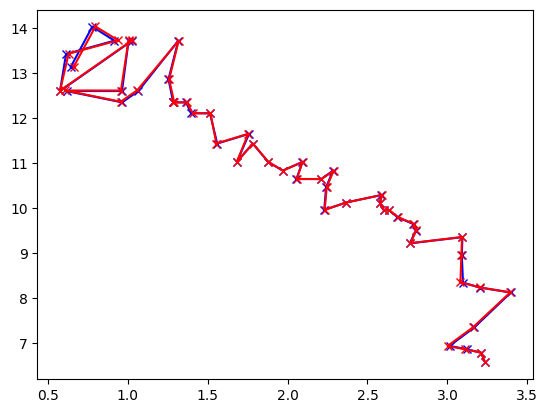

In [42]:
idx = 35

plt.plot(df.iloc[idx]['positions'][:,0], df.iloc[idx]['positions'][:,2], 'bx-')
plt.plot(odom_df.iloc[idx]['positions'][:,0], odom_df.iloc[idx]['positions'][:,2], 'rx-')
plt.show()